In [1]:
import pandas as pd

# Data Upload

In [2]:
df= pd.read_excel("1.5 MLD (Outlet TSS).xlsx")
df

,STP_Inlet-COD_U,STP_Inlet-BOD_U,STP_Inlet-TSS_U,STP_Inlet-Total_nitrogen_U,STP_Inlet-Total Phosphorus_U,STP_Outlet-TSS_U
0,170.4,64.4,108.6,67.0,6.3,13.8
1,170.2,64.3,108.7,76.8,6.1,13.8
2,175.6,65.0,113.4,64.6,5.7,13.7
3,173.2,63.3,112.2,83.1,6.1,13.7
4,170.6,61.6,111.5,52.3,5.0,13.5
...,...,...,...,...,...,...
373,259.8,143.2,160.8,2.9,6.8,4.7
374,266.3,143.3,170.9,6.7,6.8,4.7
375,280.7,142.0,202.6,6.7,6.9,4.7
376,287.9,138.7,220.5,4.3,6.5,4.7


# Data preparation

## Separation of data in X and Y

In [3]:
y= df['STP_Outlet-TSS_U']
y

0      13.8
1      13.8
2      13.7
3      13.7
4      13.5
       ... 
373     4.7
374     4.7
375     4.7
376     4.7
377     4.7
Name: STP_Outlet-TSS_U, Length: 378, dtype: float64

In [4]:
x= df.drop('STP_Outlet-TSS_U', axis=1)
x

,STP_Inlet-COD_U,STP_Inlet-BOD_U,STP_Inlet-TSS_U,STP_Inlet-Total_nitrogen_U,STP_Inlet-Total Phosphorus_U
0,170.4,64.4,108.6,67.0,6.3
1,170.2,64.3,108.7,76.8,6.1
2,175.6,65.0,113.4,64.6,5.7
3,173.2,63.3,112.2,83.1,6.1
4,170.6,61.6,111.5,52.3,5.0
...,...,...,...,...,...
373,259.8,143.2,160.8,2.9,6.8
374,266.3,143.3,170.9,6.7,6.8
375,280.7,142.0,202.6,6.7,6.9
376,287.9,138.7,220.5,4.3,6.5


## Data splitting

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

### Training Data

In [6]:
x_train

,STP_Inlet-COD_U,STP_Inlet-BOD_U,STP_Inlet-TSS_U,STP_Inlet-Total_nitrogen_U,STP_Inlet-Total Phosphorus_U
205,197.9,94.6,135.6,11.1,6.7
326,229.0,126.6,141.2,1.8,6.7
97,183.6,77.5,131.1,57.7,6.6
204,200.3,97.3,136.4,16.6,6.9
3,173.2,63.3,112.2,83.1,6.1
...,...,...,...,...,...
343,238.7,135.2,148.9,2.2,6.4
359,249.5,139.6,160.8,1.5,6.0
323,229.5,127.3,142.1,1.9,6.7
280,203.8,95.9,139.8,1.7,6.8


### Testing Data

In [7]:
x_test

,STP_Inlet-COD_U,STP_Inlet-BOD_U,STP_Inlet-TSS_U,STP_Inlet-Total_nitrogen_U,STP_Inlet-Total Phosphorus_U
331,230.8,128.0,142.1,2.2,6.9
158,180.0,70.8,135.0,2.3,2.8
300,219.7,116.1,141.5,1.2,6.4
272,201.1,95.8,139.2,15.7,6.9
142,182.7,69.6,134.0,30.3,6.8
...,...,...,...,...,...
153,184.4,81.9,131.0,4.8,5.2
324,228.6,126.8,141.4,1.8,6.7
374,266.3,143.3,170.9,6.7,6.8
356,245.5,134.9,154.9,2.4,5.6


In [8]:
y_train

205     8.3
326     4.6
97     12.1
204     8.1
3      13.7
       ... 
343     4.5
359     4.8
323     4.6
280     8.9
8      13.6
Name: STP_Outlet-TSS_U, Length: 302, dtype: float64

## Model Building

### Random Forest

### Training

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor( max_depth= 5, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=100)

### Prediction by model

In [44]:
y_rf_train_pred= rf.predict(x_train)
y_rf_test_pred= rf.predict(x_test)

### Evaluation of Model

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse= mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2= r2_score(y_train, y_rf_train_pred)

rf_test_mse= mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2= r2_score(y_test, y_rf_test_pred)

In [46]:
rf_test_r2

0.7470617713171311

In [47]:
import pandas as pd
rf_results= pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results

,0,1,2,3,4
0,Random Forest,1.739585,0.85902,1.942812,0.747062


In [48]:
rf_results.columns = ['Methods', 'Train MSE','Train R2', 'Test MSE', 'Test R2']
rf_results

,Methods,Train MSE,Train R2,Test MSE,Test R2
0,Random Forest,1.739585,0.85902,1.942812,0.747062


#### The lower the MSE, the better the model predictive accuracy, and, the better the regression model is.The greater the value of R-Squared, the better is the regression model.

In [49]:
import matplotlib.pyplot as plt
import numpy as num

Text(0, 0.5, 'Y_Test_Prediction')

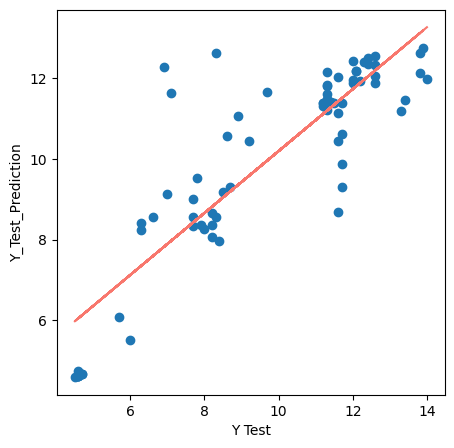

In [50]:
plt.figure(figsize=(5,5))

plt.scatter (y=y_rf_test_pred, x=y_test, label='Original')



z= np.polyfit (y_test, y_rf_test_pred,1)
p= np.poly1d(z)

plt.plot(y_test, p(y_test), '#F8776D')
plt.xlabel('Y Test')
plt.ylabel('Y_Test_Prediction')

Text(0, 0.5, 'Y_Test_Prediction')

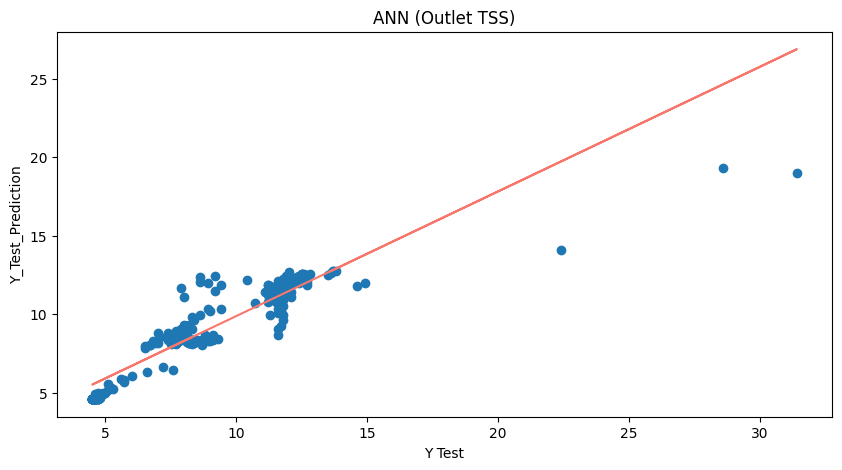

In [51]:
plt.figure(figsize=(10,5))
plt.title('ANN (Outlet TSS)')
plt.scatter (y=y_rf_train_pred, x=y_train, label='Original')



z= np.polyfit (y_train, y_rf_train_pred,1)
p= np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8776D')
plt.xlabel('Y Test')
plt.ylabel('Y_Test_Prediction')